# 0. Environment Setting & Read data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
order = pd.read_csv('C:/Users/happy/Desktop/project/data/order.csv', index_col=0)
order_last = pd.read_csv('C:/Users/happy/Desktop/project/data/order_last.csv',index_col=0)

In [3]:
order.head()

,ID,board_station,alight_station,adult,teen,child,distance,fare,suc_status,suc_status_d,call_time,board_time,alight_time,suc_time,cancel_time,x,y,board_adm,alight_adm
0,1,10258,10093,1,0,0,0.0,0,배차불가,NaN,2021-02-15 00:00:24,NaN,NaN,NaN,2021-02-15 00:00:25,37.508302,126.513957,운북동,운남동
1,7,10258,12005,1,0,0,0.0,0,배차불가,NaN,2021-02-15 00:00:35,NaN,NaN,NaN,2021-02-15 00:00:35,37.508586,126.513748,운북동,운서동(주거)
2,1,10258,10093,1,0,0,0.0,0,배차불가,NaN,2021-02-15 00:00:46,NaN,NaN,NaN,2021-02-15 00:00:46,37.508371,126.514027,운북동,운남동
3,7901,10258,10196,1,0,0,0.0,0,배차불가,NaN,2021-02-15 00:00:47,NaN,NaN,NaN,2021-02-15 00:00:47,37.508612,126.513747,운북동,운북동
4,7,10258,12005,1,0,0,0.0,0,배차불가,NaN,2021-02-15 00:00:56,NaN,NaN,NaN,2021-02-15 00:00:56,37.508598,126.513748,운북동,운서동(주거)


In [4]:
# column 별 null 값 갯수
order.isnull().sum()

ID                      0
board_station           0
alight_station          0
adult                   0
teen                    0
child                   0
distance                0
fare                    0
suc_status              0
suc_status_d      3612594
call_time               0
board_time        3523346
alight_time       3523346
suc_time          3487874
cancel_time        129908
x                    4843
y                    4843
board_adm               0
alight_adm              2
dtype: int64

In [5]:
# datatype conversion 
order['call_time'] = order['call_time'].astype('datetime64')
order['board_time'] = order['board_time'].astype('datetime64')
order['alight_time'] = order['alight_time'].astype('datetime64')
order['suc_time'] = order['suc_time'].astype('datetime64')

In [6]:
order_last['call_time'] = order_last['call_time'].astype('datetime64')
order_last['board_time'] = order_last['board_time'].astype('datetime64')
order_last['alight_time'] = order_last['alight_time'].astype('datetime64')
order_last['suc_time'] = order_last['suc_time'].astype('datetime64')

# 1. 시간정보

## 1-1. Call Time

In [7]:
print(min(order['call_time']))
print(max(order['call_time']))

2021-02-15 00:00:24
2022-07-02 22:59:05


기록상 호출 이력 날짜 : 2021년 2월 15일 ~ 2021년 5월 15일, 2021년 7월 25일 ~ 2022년 7월 2일 

In [25]:
df_1 = order.loc[:,['ID', 'call_time']]
df_1['call_time'] = df_1['call_time'].dt.strftime('%Y/%m/%d')
df_1.head()

,ID,call_time
0,1,2021/02/15
1,7,2021/02/15
2,1,2021/02/15
3,7901,2021/02/15
4,7,2021/02/15


<AxesSubplot:xlabel='call_time', ylabel='count'>

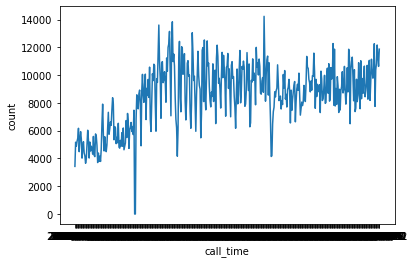

In [26]:
a = pd.DataFrame(df_1.groupby('call_time')['ID'].count()).rename(columns={'ID':'count'})
sns.lineplot(data = a, x = "call_time", y = "count")

# 급격히 호출 건수 감소 구역 : 기록 안된 날짜들 

In [ ]:
# weekdays vs weekends

In [34]:
# 하루 평균 순 호출 수
a['count'].mean()

8524.885780885781

In [31]:
df_2 = order_last.loc[:,['ID', 'call_time']]
df_2['call_time'] = df_2['call_time'].dt.strftime('%Y/%m/%d')
df_2.head()

,ID,call_time
0,1,2021/02/15
1,1,2021/02/15
2,1,2021/02/15
3,1,2021/02/15
4,1,2021/02/15


<AxesSubplot:xlabel='call_time', ylabel='count'>

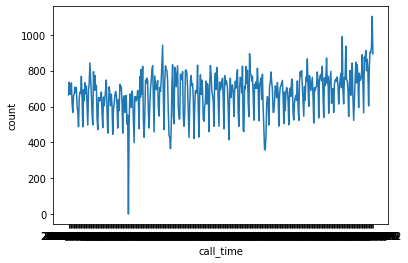

In [33]:
b = pd.DataFrame(df_2.groupby('call_time')['ID'].count()).rename(columns={'ID':'count'})
sns.lineplot(data = b, x = "call_time", y = "count")

# 급격히 호출 건수 감소 구역 : 기록 안된 날짜들 

In [35]:
# 실 이동수요 반영한 하루 평균 호출 수
b['count'].mean()

675.1098130841121

In [39]:
df_3 = order_last.loc[:,['ID', 'call_time']]
df_3['call_time'] = df_3['call_time'].dt.strftime('%H')
df_3.head()

,ID,call_time
0,1,00
1,1,00
2,1,00
3,1,03
4,1,19


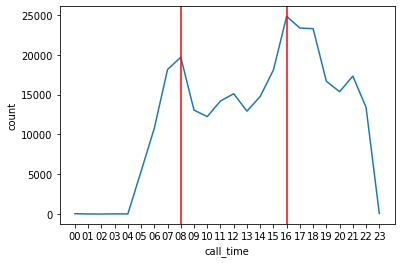

In [44]:
c = pd.DataFrame(df_3.groupby('call_time')['ID'].count()).rename(columns={'ID':'count'})
sns.lineplot(data = c, x = "call_time", y = "count")
plt.axvline(x=8, color = 'red')
plt.axvline(x=16, color = 'red')

## 1-2. Waiting Time

In [51]:
# 파생변수 wait_time 생성
order['wait_time'] = order['alight_time'] - order['call_time']
order_last['wait_time'] = order['alight_time'] - order['call_time']
order.head(3)

,ID,alight_station,off_station,adult,teen,child,distance,fare,suc_status,suc_status_d,call_time,alight_time,off_time,suc_time,cancel_time,x,y,alight_adm,off_adm,wait_time
0,1,10258,10093,1,0,0,0.0,0,배차불가,NaN,2021-02-15 00:00:24,NaT,NaT,NaT,2021-02-15 00:00:25,37.508302,126.513957,운북동,운남동,NaT
1,7,10258,12005,1,0,0,0.0,0,배차불가,NaN,2021-02-15 00:00:35,NaT,NaT,NaT,2021-02-15 00:00:35,37.508586,126.513748,운북동,운서동(주거),NaT
2,1,10258,10093,1,0,0,0.0,0,배차불가,NaN,2021-02-15 00:00:46,NaT,NaT,NaT,2021-02-15 00:00:46,37.508371,126.514027,운북동,운남동,NaT


In [56]:
order_last['wait_time'] = order_last['wait_time'].astype("timedelta64[s]") / 60

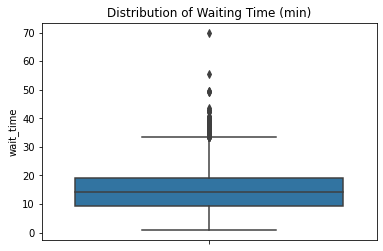

In [59]:
sns.boxplot( y=order_last["wait_time"] )
plt.title("Distribution of Waiting Time (min)")
plt.show()

In [60]:
order_last['wait_time'].describe()

count    16895.000000
mean        14.662348
std          7.003911
min          0.750000
25%          9.416667
50%         14.200000
75%         18.983333
max         69.933333
Name: wait_time, dtype: float64

## 1-3. Alight / Off Time

In [25]:
print(min(order[order['alight_time'].notnull()]['alight_time']))
print(max(order[order['alight_time'].notnull()]['alight_time']))

2021-02-15 00:09:11
2022-07-02 23:13:50


In [26]:
print(min(order[order['off_time'].notnull()]['off_time']))
print(max(order[order['off_time'].notnull()]['off_time']))

2021-02-15 00:10:58
2022-07-02 23:23:14


In [65]:
full_ride = order_last[(order_last['alight_time'].notnull())]

In [69]:
df_4 = full_ride.loc[:,['ID', 'alight_time', 'off_time']]
df_4['off_time'] = df_4['off_time'].dt.strftime('%Y/%m/%d')
df_4.head()

,ID,alight_time,off_time
2,1,2021-02-15 01:54:27,2021/02/15
6,1,2021-02-15 19:30:53,2021/02/15
72,5,2021-02-15 00:17:47,2021/02/15
73,5,2021-02-15 03:14:01,2021/02/15
80,6,2021-02-15 01:18:12,2021/02/15


<AxesSubplot:xlabel='off_time', ylabel='count'>

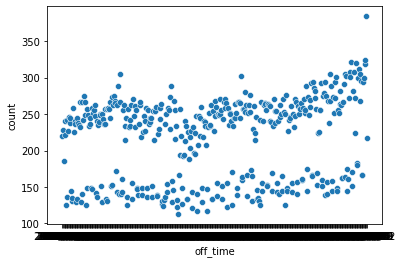

In [73]:
d = pd.DataFrame(df_4.groupby('off_time')['ID'].count()).rename(columns={'ID':'count'})
sns.scatterplot(data = d, x = "off_time", y = "count")

In [ ]:
# weekdays vs weekends 

Text(0.5, 1.0, 'Count by Time Alighted')

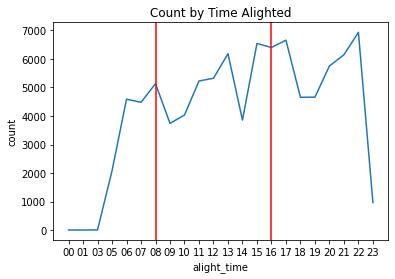

In [78]:
df_5 = full_ride.loc[:,['ID', 'alight_time', 'off_time']]
df_5['alight_time'] = df_5['alight_time'].dt.strftime('%H')
df_5['off_time'] = df_5['off_time'].dt.strftime('%H')

e = pd.DataFrame(df_5.groupby('alight_time')['ID'].count()).rename(columns={'ID':'count'})
sns.lineplot(data = e, x = "alight_time", y = "count")
plt.axvline(x=6, color = 'red')
plt.axvline(x=14, color = 'red')
plt.title('Count by Time Alighted')



Text(0.5, 1.0, 'Count by Time Got Off')

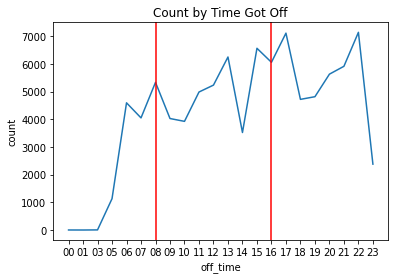

In [79]:
f = pd.DataFrame(df_5.groupby('off_time')['ID'].count()).rename(columns={'ID':'count'})
sns.lineplot(data = f, x = "off_time", y = "count")
plt.axvline(x=6, color = 'red')
plt.axvline(x=14, color = 'red')
plt.title('Count by Time Got Off')

## 1-4. 이동시간

In [62]:
# 파생변수 ivt 생성
order['ivt'] = order['off_time'] - order['alight_time']
order_last['ivt'] = order['off_time'] - order['alight_time']
order.head(3)

,ID,alight_station,off_station,adult,teen,child,distance,fare,suc_status,suc_status_d,...,alight_time,off_time,suc_time,cancel_time,x,y,alight_adm,off_adm,wait_time,ivt
0,1,10258,10093,1,0,0,0.0,0,배차불가,NaN,...,NaT,NaT,NaT,2021-02-15 00:00:25,37.508302,126.513957,운북동,운남동,NaT,NaT
1,7,10258,12005,1,0,0,0.0,0,배차불가,NaN,...,NaT,NaT,NaT,2021-02-15 00:00:35,37.508586,126.513748,운북동,운서동(주거),NaT,NaT
2,1,10258,10093,1,0,0,0.0,0,배차불가,NaN,...,NaT,NaT,NaT,2021-02-15 00:00:46,37.508371,126.514027,운북동,운남동,NaT,NaT


In [63]:
order_last['ivt'] = order_last['ivt'].astype("timedelta64[s]") / 60
order_last['ivt'].describe()

count    16895.000000
mean        16.095405
std         13.319817
min          0.200000
25%         11.000000
50%         14.766667
75%         19.650000
max       1029.300000
Name: ivt, dtype: float64

In [ ]:
# outlier 제거 후 분포 시각화


# 2. 공간정보